In [81]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from itertools import combinations
from efficient_apriori import apriori
from tqdm import tqdm
import warnings
import os
import ast
warnings.filterwarnings('ignore')


In [82]:
%reload_ext watermark
%watermark -a "Guilherme"
%watermark --iversion

Author: Guilherme

missingno        : 0.5.2
numpy            : 1.26.4
tqdm             : 4.66.5
efficient_apriori: 2.0.6
matplotlib       : 3.9.2
pandas           : 2.2.2



In [20]:
# Função para facilitar a criação de alguns gráficos
def cria_graficos(dados, titulo:str, xlabel:str):

        '''
    Gera um gráfico de barras horizontal com base nos dados fornecidos.

    Esta função cria uma visualização simples usando `matplotlib`, ideal para 
    representar distribuições ou frequências de categorias.

    Parametros:
    ----------
        dados (pd.Series): Série do pandas contendo os dados a serem plotados. 
            Os índices serão usados como categorias no eixo x e os valores como altura das barras.
        titulo (str): Título do gráfico.
        xlabel (str): Rótulo do eixo x.

    Resultado:
    ----------
        Um gráfico de barras com os dados fornecidos.
    '''
    plt.figure(figsize=(14,4))
    plt.bar(dados.index, dados.values)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.xticks(rotation =90)
    plt.show()

# Importando as bases

In [72]:
# Importando todos os arquivos csv de uma só vez

# Caminho da pasta onde estão os arquivos CSV
pasta_csv = os.getcwd() 

# Lista todos os arquivos CSV na pasta
arquivos_csv = [arquivo for arquivo in os.listdir(pasta_csv) if arquivo.endswith('.csv')]

# Loop para importar e criar variáveis dinamicamente
for arquivo in tqdm(arquivos_csv, colour ='green'):
    nome_base = os.path.splitext(arquivo)[0]  # remove a extensão .csv
    nome_variavel = f'dados_{nome_base}'
    caminho_completo = os.path.join(pasta_csv, arquivo)
    globals()[nome_variavel] = pd.read_csv(caminho_completo)

    print(f'Arquivo {nome_variavel} importado com sucesso')


  0%|                                                                                                                                                                                     | 0/6 [00:00<?, ?it/s]

Arquivo dados_corredores importado com sucesso
Arquivo dados_departamentos importado com sucesso


 50%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                                      | 3/6 [00:02<00:02,  1.50it/s]

Arquivo dados_pedidos importado com sucesso
Arquivo dados_produtos importado com sucesso


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 5/6 [00:11<00:02,  2.62s/it]

Arquivo dados_transacoes importado com sucesso


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:17<00:00,  2.85s/it]

Arquivo dados_transacoes_mba importado com sucesso


# Análise exploratória dos dados

In [34]:
# Função para identificar duplicados em cada coluna

def verifica_duplicados(df,col):

        '''
        Realiza a contagem de valores ausentes

        Parâmetros: 
        ----------
        df: dataframe que está sendo trabalhado
        col: Coluna desejada para verificação

        Retorna:
        ----------
        contagem: Quantidade de valores ausentes do DataFrame:
        '''

    return df.duplicated(col).value_counts()


In [35]:
# Total de registros por dataset
conta_arrays = np.array([
                        ['dados_departamentos',len(dados_departamentos),dados_departamentos.shape[1]],
                        ['dados_corredores',len(dados_corredores),dados_corredores.shape[1]],
                        ['dados_produtos',len(dados_produtos),dados_produtos.shape[1]],
                        ['dados_pedidos',len(dados_pedidos ), dados_pedidos.shape[1]],
                        ['dados_transacoes',len(dados_transacoes), dados_transacoes.shape[1]]            
                        ])

In [36]:
# Converte o array em um dataframe
contagem = pd.DataFrame(conta_arrays, columns=['Arquivo','Total de registros','Total de colunas'], index=None)

In [37]:
# Resultado
contagem

,Arquivo,Total de registros,Total de colunas
0,dados_departamentos,21,2
1,dados_corredores,134,2
2,dados_produtos,49688,4
3,dados_pedidos,3421083,7
4,dados_transacoes,3214874,3


### Analisando o arquivo departamento

In [38]:
dados_departamentos.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [39]:
# Verificando se possui departamentos duplicados
verifica_duplicados(dados_departamentos,'department')

False    21
Name: count, dtype: int64

### Analisando o arquivo corredores

In [40]:
dados_corredores.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [41]:
# Verificando se possui corredores duplicados
verifica_duplicados(dados_corredores,'aisle')

False    134
Name: count, dtype: int64

### Analisando o arquivo produtos

In [42]:
dados_produtos.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [43]:
# Verificando se possui produtos duplicados
verifica_duplicados(dados_produtos,'product_name')

False    49688
Name: count, dtype: int64

### Analisando o arquivo pedidos

In [73]:
dados_pedidos.tail()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0
3421082,272231,206209,train,14,6,14,30.0


In [45]:
verifica_duplicados(dados_pedidos, 'order_id')

False    3421083
Name: count, dtype: int64

### Analisando o arquivo de transações

In [74]:
dados_transacoes.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [47]:
dados_transacoes.duplicated().value_counts()

False    3214874
Name: count, dtype: int64

# Verificando valores ausentes

In [48]:
dados_corredores.isna().sum()

aisle_id    0
aisle       0
dtype: int64

In [49]:
dados_departamentos.isna().sum()

department_id    0
department       0
dtype: int64

In [50]:
dados_pedidos.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [51]:
dados_produtos.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [52]:
dados_transacoes.isna().sum()

Unnamed: 0    0
id_pedido     0
Produtos      0
dtype: int64

Analise: Somente consta valores ausentes na coluna 'days_since_prior_order' do arquivo de pedidos
No entanto não se trata de um erro, pois se esta ausente é por que é a primeira compra do cliente.
Vamos preencher com 0

# Tratando valores ausentes

In [3]:
# Aplicando 0 para os valores ausentes na coluna days_since_prior_order
dados_pedidos['days_since_prior_order'].fillna(value=0, inplace=True)

In [76]:
# Verificando
dados_pedidos.isna().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Parecer: Foi incluído o valor 0 para identificar que não houve compra anterior. E essa coluna não será usada em análsies posteriores, dessa forma o valor
inputado não gerará impacto.

# Realizando o Merge entre as tabelas

In [77]:
dados_produtos.head(1)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19


In [78]:
dados_corredores.head(1)

,aisle_id,aisle
0,1,prepared soups salads


In [79]:
dados_transacoes.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [4]:
# Produtos com corredores
prod_corred = pd.merge(left=dados_produtos, right=dados_corredores, on = 'aisle_id' )                  

In [5]:
# Produtos , corredores e departamentos
prod_corred_dept = pd.merge(left=prod_corred,right=dados_departamentos, on ='department_id')

In [6]:
dados_transacoes.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
# Produtos , corredores , departamentos, transações
prod_corred_dept_transac = pd.merge(left=prod_corred_dept, right=dados_transacoes, on ='product_id')

In [8]:
# Produtos , corredores , departamentos, transações e pedidos
tabela_final = pd.merge(left=prod_corred_dept_transac, right=dados_pedidos, on='order_id')

In [9]:
tabela_final.head()

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1107,7,0,38259,prior,2,1,11,7.0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,5319,3,1,196224,prior,65,1,14,1.0
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,7540,4,1,138499,prior,8,0,14,7.0
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,9228,2,0,79603,prior,2,2,10,30.0
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,9273,30,0,50005,prior,1,1,15,0.0


In [10]:
tabela_final.isnull().sum()

product_id                0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
department                0
order_id                  0
add_to_cart_order         0
reordered                 0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [32]:
tabela_final.isnull().sum() / len(tabela_final) * 100

product_id                0.0
product_name              0.0
aisle_id                  0.0
department_id             0.0
aisle                     0.0
department                0.0
order_id                  0.0
add_to_cart_order         0.0
reordered                 0.0
user_id                   0.0
eval_set                  0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64

In [87]:
%%time
df = pd.DataFrame(tabela_final.groupby('order_id')['product_id'])

CPU times: total: 6min 52s
Wall time: 11min 15s


In [88]:
df.head()

,0,1
0,2,896609 1819 5460221 9327 10458535 ...
1,3,10262720 17461 10394412 17668 10404238 ...
2,4,5871833 10054 10354056 17616 12982582 ...
3,5,3623840 6184 3750229 6348 4969367 ...
4,6,9364740 15873 26024546 40462 26871848 ...


In [89]:
# Lista
prod = []

for i in tqdm(range(len(df[0]))):
    prod.append(list(df.iloc[i][1]))

100%|█████████████████████████████████████████████████████████████████████| 3214874/3214874 [03:27<00:00, 15526.68it/s]


In [90]:
# Prepara o daataframe
transacoes_mba = pd.DataFrame({'id_pedido': df[0], 'Produtos' : prod})

In [91]:
transacoes_mba.head()

,id_pedido,Produtos
0,2,"[1819, 9327, 17794, 28985, 30035, 33120, 40141..."
1,3,"[17461, 17668, 17704, 21903, 24838, 32665, 337..."
2,4,"[10054, 17616, 21351, 22598, 25146, 26434, 277..."
3,5,"[6184, 6348, 8479, 9633, 12962, 13176, 13245, ..."
4,6,"[15873, 40462, 41897]"


In [92]:
# Salvando em disco

transacoes_mba.to_csv('transacoes_mba.csv')

# Respondendo 10 perguntas de negócios 

### 1 - Qual o número de pedidos mais frequente entre os usuários

In [13]:
dados_pedidos.tail()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0
3421082,272231,206209,train,14,6,14,30.0


In [126]:
dados = dados_pedidos.groupby('user_id')['order_number'].max().value_counts().reset_index()
print(dados)

    order_number  count
0              4  23986
1              5  19590
2              6  16165
3              7  13850
4              8  11700
..           ...    ...
92            94     57
93            91     56
94            97     54
95            98     50
96            99     47

[97 rows x 2 columns]


In [ ]:
# Número de pedidos mais frequente entre usuários é 4.

### 2 - Qual dia da semana tem o mauior número de pedidos?

In [135]:
# Criando dicionário para aplicação

dias_da_semana = {
    0: 'Domingo',
    1: 'Segunda-feira',
    2: 'Terça-feira',
    3: 'Quarta-feira',
    4: 'Quinta-feira',
    5: 'Sexta-feira',
    6: 'Sábado'
}


In [164]:
dados = dados_pedidos['order_dow'].replace(dias_da_semana).value_counts()
print(dados)

order_dow
Domingo          600905
Segunda-feira    587478
Terça-feira      467260
Sexta-feira      453368
Sábado           448761
Quarta-feira     436972
Quinta-feira     426339
Name: count, dtype: int64


In [149]:
type(dados)

pandas.core.series.Series

Resposta: Dia da semana com maior volume de pedidos é Domingo

### 3 - Qual hora do dia tem o maior número de pedidos?

In [4]:
dados_pedidos['order_hour_of_day'].value_counts().head()

order_hour_of_day
10    288418
11    284728
15    283639
14    283042
13    277999
Name: count, dtype: int64

In [173]:
dados = dados_pedidos.groupby('order_hour_of_day').size()

In [174]:
x= dados.index.tolist()
y = dados.values.tolist()

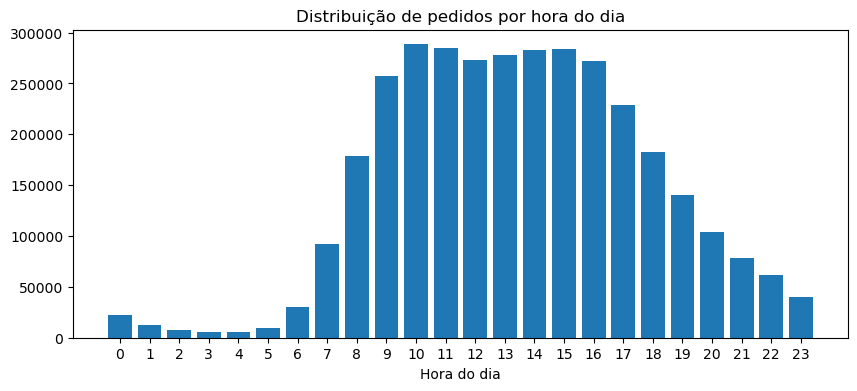

In [180]:
plt.figure(figsize=(10,4))
plt.bar(x,y)
plt.title('Distribuição de pedidos por hora do dia')
plt.xlabel('Hora do dia')
plt.xticks(x)
plt.show()

Resposta: As 10h da manhã

### 4 - Qual departamento tem o maior número de pedidos?

In [104]:
tabela_final.head()

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1107,7,0,38259,prior,2,1,11,7.0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,5319,3,1,196224,prior,65,1,14,1.0
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,7540,4,1,138499,prior,8,0,14,7.0
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,9228,2,0,79603,prior,2,2,10,30.0
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,9273,30,0,50005,prior,1,1,15,0.0


In [23]:
dados_Dep = tabela_final['department'].value_counts()
print(dados_Dep)

department
produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           709569
meat seafood        708931
personal care       447123
babies              423802
international       269253
alcohol             153696
pets                 97724
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64


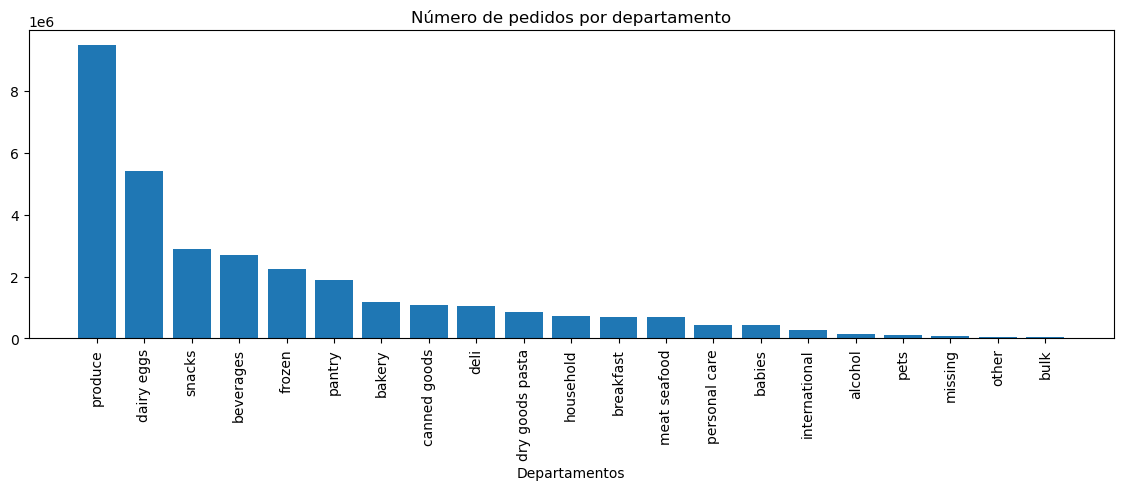

In [24]:
cria_graficos(dados_Dep, 'Número de pedidos por departamento','Departamentos')

# O Departamento com maior número de pedios é produce 

In [11]:
### 5 - Quais os 20 principais corredores por frequência de pedidos

In [16]:
dados = tabela_final.groupby('aisle')['aisle'].count().sort_values(ascending=False).head(20)
dados

aisle
fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
refrigerated                      575881
frozen produce                    522654
ice cream ice                     498425
crackers                          458838
energy granola bars               456386
eggs                              452134
lunch meat                        395130
frozen meals                      390299
baby food formula                 382456
fresh herbs                       377741
Name: aisle, dtype: int64

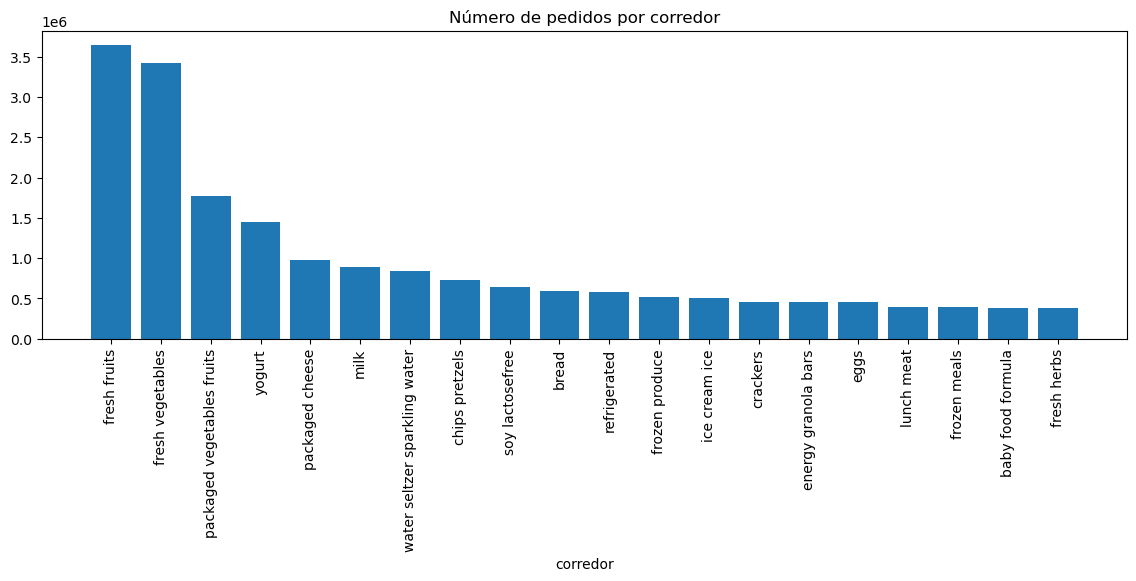

In [22]:
cria_graficos(dados, 'Número de pedidos por corredor','corredor')

### 6 - Quais os 20 principais produtos por frequência de pedidos

In [25]:
prod = tabela_final.groupby('product_name')['product_name'].count().sort_values(ascending=False).head(20)
prod

product_name
Banana                      472565
Bag of Organic Bananas      379450
Organic Strawberries        264683
Organic Baby Spinach        241921
Organic Hass Avocado        213584
Organic Avocado             176815
Large Lemon                 152657
Strawberries                142951
Limes                       140627
Organic Whole Milk          137905
Organic Raspberries         137057
Organic Yellow Onion        113426
Organic Garlic              109778
Organic Zucchini            104823
Organic Blueberries         100060
Cucumber Kirby               97315
Organic Fuji Apple           89632
Organic Lemon                87746
Apple Honeycrisp Organic     85020
Organic Grape Tomatoes       84255
Name: product_name, dtype: int64

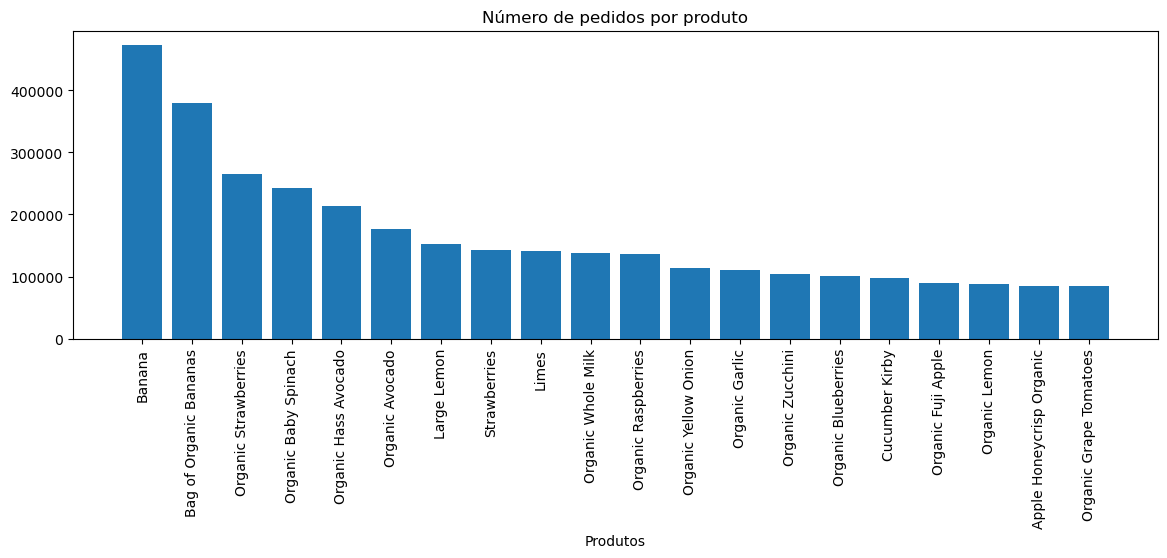

In [26]:
cria_graficos(prod,'Número de pedidos por produto','Produtos')

In [39]:
tabela_final.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'aisle',
       'department', 'order_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')

### 7 - Análise de novos pedidos semelhantes e pedidos anteriores (Reorder)

In [36]:
%%time
dados = tabela_final.groupby('product_name')['reordered'].agg(['count','sum']).rename(columns = {'count':'total','sum':'reorders'})
dados = dados.sort_values('total',ascending = False).reset_index()

CPU times: total: 4.7 s
Wall time: 4.79 s


In [37]:
dados.head()

,product_name,total,reorders
0,Banana,472565,398609
1,Bag of Organic Bananas,379450,315913
2,Organic Strawberries,264683,205845
3,Organic Baby Spinach,241921,186884
4,Organic Hass Avocado,213584,170131


# 8 - Análise de Reorder por Departamento ao longo do tempo

In [45]:
reorder = tabela_final.groupby('department')['reordered'].aggregate('mean').reset_index()
reorder.sort_values('reordered',ascending = False)

,department,reordered
7,dairy eggs,0.669969
3,beverages,0.653460
19,produce,0.649913
2,bakery,0.628141
8,deli,0.607719
18,pets,0.601285
1,babies,0.578971
5,bulk,0.577040
20,snacks,0.574180
0,alcohol,0.569924


# Análise de pedidos reorder e departamento

In [57]:
reorder = tabela_final.groupby('department')['reordered'].agg(['count','sum']).rename(columns = {'count':'total','sum':'reordered'}).reset_index()
reorder.sort_values('reordered',ascending = False)

,department,total,reordered
19,produce,9479291,6160710
7,dairy eggs,5414016,3627221
3,beverages,2690129,1757892
20,snacks,2887550,1657973
10,frozen,2236432,1211890
2,bakery,1176787,739188
16,pantry,1875577,650301
8,deli,1051249,638864
6,canned goods,1068058,488535
13,meat seafood,708931,402442


# 10- Análise de reorder por corredor

In [66]:
reorder = tabela_final.groupby('aisle')['reordered'].mean().reset_index().sort_values('reordered',ascending=False).head(20)
reorder

,aisle,reordered
83,milk,0.781428
131,water seltzer sparkling water,0.729593
50,fresh fruits,0.718104
41,eggs,0.705366
119,soy lactosefree,0.692551
96,packaged produce,0.690734
133,yogurt,0.686489
33,cream,0.685046
11,bread,0.670168
110,refrigerated,0.663302


# implementando o algoritmo apriori

O algoritmo Apriori é utilizado para análise de associação de regras, que é comumente usada em mineração de dados para descobrir relações entre variáveis em grandes bases de dados. Neste contexto, ele é usado para encontrar padrões de compra frequentes, ou seja, quais produtos são frequentemente comprados juntos. 

In [55]:
transacoes_mba = pd.read_csv('transacoes_mba.csv', usecols=['id_pedido','Produtos'])

In [56]:
transacoes_mba.head(100)

,id_pedido,Produtos
0,2,"[1819, 9327, 17794, 28985, 30035, 33120, 40141..."
1,3,"[17461, 17668, 17704, 21903, 24838, 32665, 337..."
2,4,"[10054, 17616, 21351, 22598, 25146, 26434, 277..."
3,5,"[6184, 6348, 8479, 9633, 12962, 13176, 13245, ..."
4,6,"[15873, 40462, 41897]"
...,...,...
95,103,"[1695, 5794, 30850, 40386]"
96,104,"[5212, 22124, 26604, 28745]"
97,105,"[1194, 4210, 4920, 11712, 12276, 13176, 17600,..."
98,106,"[2839, 4210, 4497, 5048, 5672, 11210, 12945, 1..."


In [57]:
# Aplicando a alteraçãpo do tipo de dados para garantir que eu tenha uma lista de números e não de strings

# Ativa o tqdm para pandas
tqdm.pandas()

# Aplica com barra de progresso
transacoes_mba['Produtos'] = transacoes_mba['Produtos'].progress_apply(ast.literal_eval)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3214874/3214874 [02:13<00:00, 24073.01it/s]


In [58]:
transacoes_mba.head()

,id_pedido,Produtos
0,2,"[1819, 9327, 17794, 28985, 30035, 33120, 40141..."
1,3,"[17461, 17668, 17704, 21903, 24838, 32665, 337..."
2,4,"[10054, 17616, 21351, 22598, 25146, 26434, 277..."
3,5,"[6184, 6348, 8479, 9633, 12962, 13176, 13245, ..."
4,6,"[15873, 40462, 41897]"


In [59]:
# Prepara uma tupla com as transações

transacoes_mba_tupla = [tuple(row) for row in tqdm(transacoes_mba['Produtos'].tolist())]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3214874/3214874 [00:02<00:00, 1213406.68it/s]


In [60]:
transacoes_mba_tupla[0:10]

[(1819, 9327, 17794, 28985, 30035, 33120, 40141, 43668, 45918),
 (17461, 17668, 17704, 21903, 24838, 32665, 33754, 46667),
 (10054,
  17616,
  21351,
  22598,
  25146,
  26434,
  27761,
  32645,
  34862,
  39758,
  40285,
  41276,
  46842),
 (6184,
  6348,
  8479,
  9633,
  12962,
  13176,
  13245,
  15005,
  18569,
  20914,
  23909,
  24773,
  27360,
  27966,
  37011,
  38693,
  40878,
  41176,
  45698,
  46522,
  47209,
  47329,
  48002,
  48366,
  48370,
  48825),
 (15873, 40462, 41897),
 (34050, 46802),
 (23423,),
 (432,
  2014,
  3990,
  11182,
  14183,
  14992,
  18362,
  21405,
  23288,
  27366,
  29193,
  31506,
  34203,
  44533,
  47890),
 (1529,
  3464,
  4605,
  4796,
  14992,
  21137,
  22122,
  24852,
  25720,
  26842,
  27156,
  31717,
  34134,
  47766,
  49235),
 (1313, 5994, 27085, 30162, 31506)]

In [63]:
%%time
itemsets_ap, rules_ap = apriori(transacoes_mba_tupla[:500000], min_support = 0.01, min_confidence = 0.2,max_length=2)

CPU times: total: 4.03 s
Wall time: 4.12 s


In [64]:
rules_ap[:10]

[{21137} -> {13176},
 {21903} -> {13176},
 {27966} -> {13176},
 {47209} -> {13176},
 {16797} -> {24852},
 {21137} -> {24852},
 {27966} -> {21137},
 {21903} -> {24852},
 {28204} -> {24852},
 {47626} -> {24852}]

In [65]:
# Vamos considerar alguns itens para nossa análise
item_A = [27966,47209,21137,47766,21903,49683,47626,28204,16797,21903,21137,27966]
item_B = [13176,13176,24852,24852,24852,24852,24852,24852,24852,13176,13176,21137]
temp = pd.DataFrame()
temp['itemA'] = item_A
temp['itemB'] = item_B

In [66]:
temp

,itemA,itemB
0,27966,13176
1,47209,13176
2,21137,24852
3,47766,24852
4,21903,24852
5,49683,24852
6,47626,24852
7,28204,24852
8,16797,24852
9,21903,13176


In [67]:
# Listas para as métricas
support_A = []
support_B = []
support_AB = []
confidence_AB = []
lift_AB = []

In [69]:
# Loop
for i in range(len(temp)):
    
    # Calcula o support de A
    support_A.append(itemsets_ap[1][tuple([temp['itemA'][i],])] / len(temp))
    
    # Calcula o support de B
    support_B.append(itemsets_ap[1][tuple([temp['itemB'][i],])] / len(temp))
    
    # Calcula o support de A e B
    if tuple([temp['itemA'][i],temp['itemB'][i]]) in itemsets_ap[2].keys():
        support_AB.append(itemsets_ap[2][tuple([temp['itemA'][i],temp['itemB'][i]])] / 30000)
    else:
        support_AB.append(itemsets_ap[2][tuple([temp['itemB'][i],temp['itemA'][i]])] / 30000)
    
    # Calcula a confidence
    confidence_AB.append(support_AB[i] / support_A[i])
    
    # Calcula o lift
    lift_AB.append(support_AB[i] / (support_A[i] * support_B[i]))

In [73]:
# Dataframe com as regras de associação
df_rules_ap = pd.DataFrame()
df_rules_ap['product_id'] = item_A
df_rules_ap = df_rules_ap.merge(dados_produtos, on = 'product_id', how = 'left')
df_rules_ap['Product_A'] = df_rules_ap['product_name']
df_rules_ap = df_rules_ap.drop(columns = ['product_id','product_name','aisle_id','department_id'], axis = 1)
df_rules_ap['product_id'] = item_B
df_rules_ap = df_rules_ap.merge(dados_produtos, on = 'product_id', how = 'left')
df_rules_ap['Product_B'] = df_rules_ap['product_name']
df_rules_ap = df_rules_ap.drop(columns = ['product_id','product_name','aisle_id','department_id'], axis = 1)
df_rules_ap['Support_A'] = support_A
df_rules_ap['Support_B'] = support_B
df_rules_ap['Support_AB'] = support_AB
df_rules_ap['Confidence_AB'] = confidence_AB
df_rules_ap['Lift_AB'] = lift_AB

In [74]:
df_rules_ap

,Product_A,Product_B,Support_A,Support_B,Support_AB,Confidence_AB,Lift_AB
0,Organic Raspberries,Bag of Organic Bananas,1763.916667,4908.416667,0.207133,0.000117,2.392382e-08
1,Organic Hass Avocado,Bag of Organic Bananas,2759.083333,4908.416667,0.321000,0.000116,2.370275e-08
2,Organic Strawberries,Banana,3439.583333,6133.083333,0.293267,0.000085,1.390202e-08
3,Organic Avocado,Banana,2273.500000,6133.083333,0.272133,0.000120,1.951677e-08
4,Organic Baby Spinach,Banana,3125.000000,6133.083333,0.266933,0.000085,1.392752e-08
5,Cucumber Kirby,Banana,1259.083333,6133.083333,0.167067,0.000133,2.163498e-08
6,Large Lemon,Banana,1988.250000,6133.083333,0.211533,0.000106,1.734718e-08
7,Organic Fuji Apple,Banana,1164.250000,6133.083333,0.177167,0.000152,2.481172e-08
8,Strawberries,Banana,1854.000000,6133.083333,0.215033,0.000116,1.891112e-08
9,Organic Baby Spinach,Bag of Organic Bananas,3125.000000,4908.416667,0.258333,0.000083,1.684182e-08


In [75]:
# Ordenando pela Confidence
df_rules_ap.sort_values(by = 'Confidence_AB', ascending = False)

,Product_A,Product_B,Support_A,Support_B,Support_AB,Confidence_AB,Lift_AB
7,Organic Fuji Apple,Banana,1164.250000,6133.083333,0.177167,0.000152,2.481172e-08
5,Cucumber Kirby,Banana,1259.083333,6133.083333,0.167067,0.000133,2.163498e-08
3,Organic Avocado,Banana,2273.500000,6133.083333,0.272133,0.000120,1.951677e-08
0,Organic Raspberries,Bag of Organic Bananas,1763.916667,4908.416667,0.207133,0.000117,2.392382e-08
1,Organic Hass Avocado,Bag of Organic Bananas,2759.083333,4908.416667,0.321000,0.000116,2.370275e-08
8,Strawberries,Banana,1854.000000,6133.083333,0.215033,0.000116,1.891112e-08
6,Large Lemon,Banana,1988.250000,6133.083333,0.211533,0.000106,1.734718e-08
11,Organic Raspberries,Organic Strawberries,1763.916667,3439.583333,0.175400,0.000099,2.890984e-08
10,Organic Strawberries,Bag of Organic Bananas,3439.583333,4908.416667,0.318700,0.000093,1.887708e-08
4,Organic Baby Spinach,Banana,3125.000000,6133.083333,0.266933,0.000085,1.392752e-08


## Conclusão

Aplicando Matemática e Estatística via programação executamos uma análise de MBA gerando como resultado as regras de associação entre os produtos com diferentes métricas.



In [76]:
%reload_ext watermark
%watermark -a "Guilherme"
%watermark --iversion

Author: Guilherme

missingno        : 0.5.2
numpy            : 1.26.4
tqdm             : 4.66.5
efficient_apriori: 2.0.6
matplotlib       : 3.9.2
pandas           : 2.2.2

